# Laboratory 3 - Nonparametric regression models

**Statistical Learning Methods**

**Author:** Łukasz Kraiński 

**Email:** lukasz.krainski123@gmail.com

[Repository](https://github.com/KrainskiL/SLM_S1920/Class3)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Smoothing-spline-and-EDA" data-toc-modified-id="Smoothing-spline-and-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Smoothing spline and EDA</a></span></li><li><span><a href="#Correlation-plots---corrplot-package" data-toc-modified-id="Correlation-plots---corrplot-package-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Correlation plots - corrplot package</a></span></li><li><span><a href="#Cross-Validation-and-LOESS" data-toc-modified-id="Cross-Validation-and-LOESS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cross Validation and LOESS</a></span></li><li><span><a href="#GAM" data-toc-modified-id="GAM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GAM</a></span></li></ul></div>

## Smoothing spline and EDA

In [1]:
library(corrplot)

corrplot 0.84 loaded



In [2]:
DATA_SET = read.table("https://raw.githubusercontent.com/KrainskiL/SLM_S1920/master/Class3/DATA4-12.txt")

**Function to split plot box in line with number of plotted elements**

In [3]:
OptimizeMfrow = function(elements) {
  columns = ceiling(sqrt(elements))
  rows = ifelse(columns * (columns - 1) < elements, columns, columns - 1)
  return(c(rows, columns))
}

**Function to draw histograms and density estimates**

In [4]:
DoHistogram = function(values, values.name) {
  histogram = hist(values, plot = FALSE)
  density.estimate = density(values)
  y.maximum = max(histogram$density, density.estimate$y)
  plot(histogram, freq = FALSE, ylim = c(0, y.maximum), 
       xlab = values.name, ylab = "density", main = NULL)
  lines(density.estimate, lwd = 2)
}

**Function to draw scatterplots and splines**

In [5]:
DoScatterplot = function(x.values, x.name) {
  plot(x.values, DATA_SET$MORT,
       xlab = x.name, ylab = "MORT", main = NULL, col = gray(0.4))
  lines(smooth.spline(x.values, DATA_SET$MORT), lwd = 2)
  abline(lm(DATA_SET$MORT ~ x.values)$coef, col = gray(0.7), lwd = 2, lty = 2)
}

**Function to draw boxplots**

In [6]:
DoBoxplot = function(values, values.name) {
  boxplot(values, horizontal = TRUE, xlab = values.name)
  median.leg = paste("median = ", round(median(values), digits = 4))
  q25 = quantile(values, 0.25)
  q25.leg = paste("25th percentile =", round(q25,digits = 4),"\n")
  q75 = quantile(values, 0.75)
  q75.leg = paste("75th percentile =", round(q75,digits = 4))
  legend(x = "top", median.leg, bty = "n")
  legend(x = "bottom", paste(q25.leg, q75.leg, sep = ""), bty = "n")
}

In [7]:
names(DATA_SET) = c("MORT", "INCC", "POV", "EDU1", "EDU2", "ALCC",
                     "TOBC", "HEXC", "PHYS", "URB", "AGED")

In [8]:
cat("Variable names:\n", names(DATA_SET))
cat("\n\nBasic statistics:\n")
print(summary(DATA_SET))
cat("\nCorrelation matrix:\n")
cormat = cor(DATA_SET)
print(cormat, digits = 1)

Variable names:
 MORT INCC POV EDU1 EDU2 ALCC TOBC HEXC PHYS URB AGED

Basic statistics:
      MORT             INCC            POV              EDU1       
 Min.   : 396.2   Min.   : 9187   Min.   :0.0790   Min.   :0.5310  
 1st Qu.: 803.4   1st Qu.:11446   1st Qu.:0.1010   1st Qu.:0.6305  
 Median : 876.3   Median :13228   Median :0.1180   Median :0.6790  
 Mean   : 855.0   Mean   :13249   Mean   :0.1262   Mean   :0.6746  
 3rd Qu.: 937.9   3rd Qu.:14380   3rd Qu.:0.1475   3rd Qu.:0.7320  
 Max.   :1120.5   Max.   :18187   Max.   :0.2390   Max.   :0.8250  
      EDU2             ALCC            TOBC            HEXC     
 Min.   :0.1040   Min.   :1.530   Min.   : 66.5   Min.   :1203  
 1st Qu.:0.1390   1st Qu.:2.255   1st Qu.:109.2   1st Qu.:1530  
 Median :0.1580   Median :2.630   Median :118.6   Median :1671  
 Mean   :0.1632   Mean   :2.713   Mean   :120.5   Mean   :1738  
 3rd Qu.:0.1825   3rd Qu.:2.960   3rd Qu.:128.3   3rd Qu.:1863  
 Max.   :0.2750   Max.   :5.340   Max.   :201

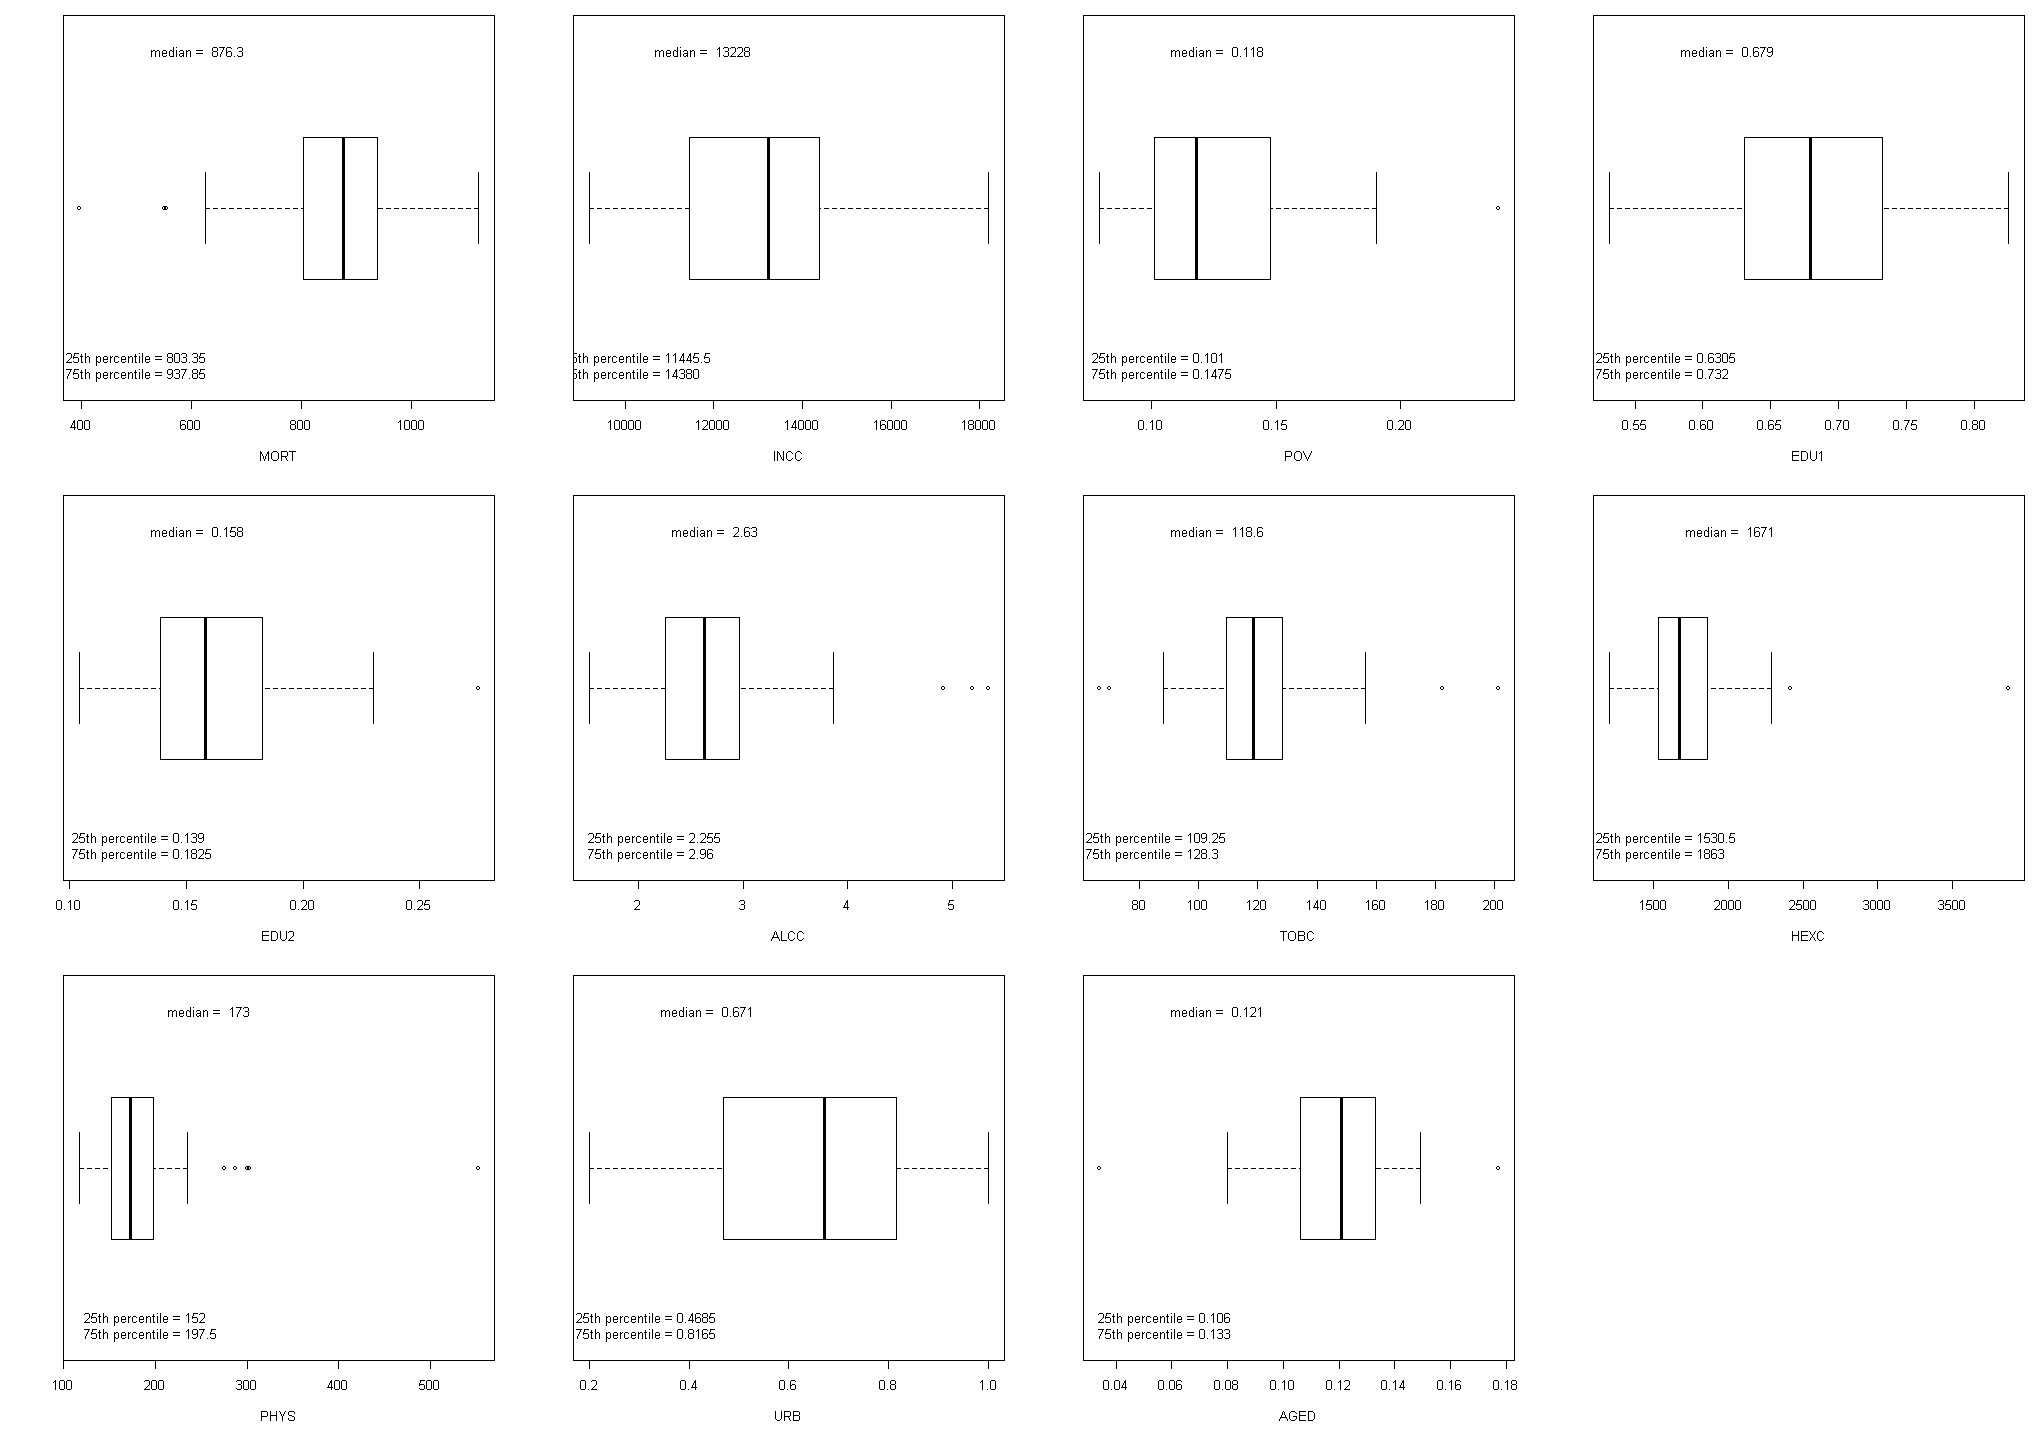

In [9]:
options(repr.plot.width=17, repr.plot.height=12)
par(mfrow = OptimizeMfrow(ncol(DATA_SET)),  mar = c(5, 4, 1, 1))
invisible(mapply(DoBoxplot, DATA_SET, names(DATA_SET)))

## Correlation plots - corrplot package

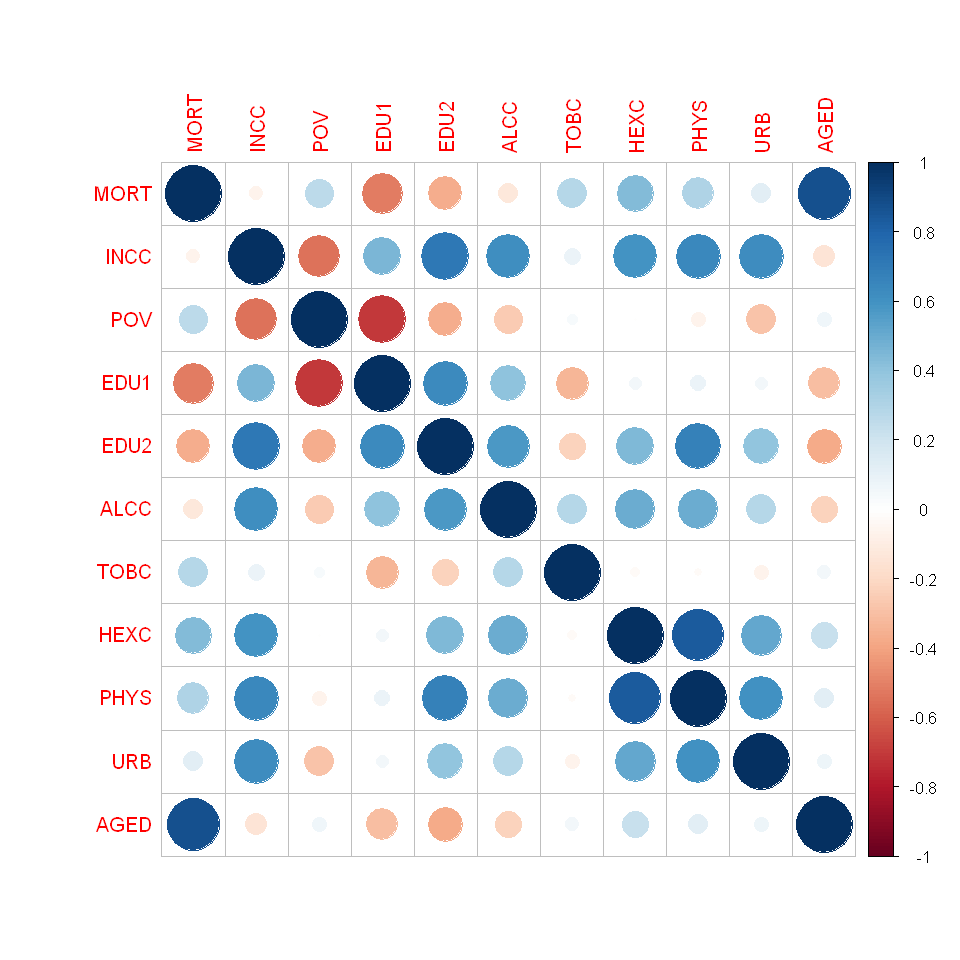

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
corrplot(cormat, method="circle")

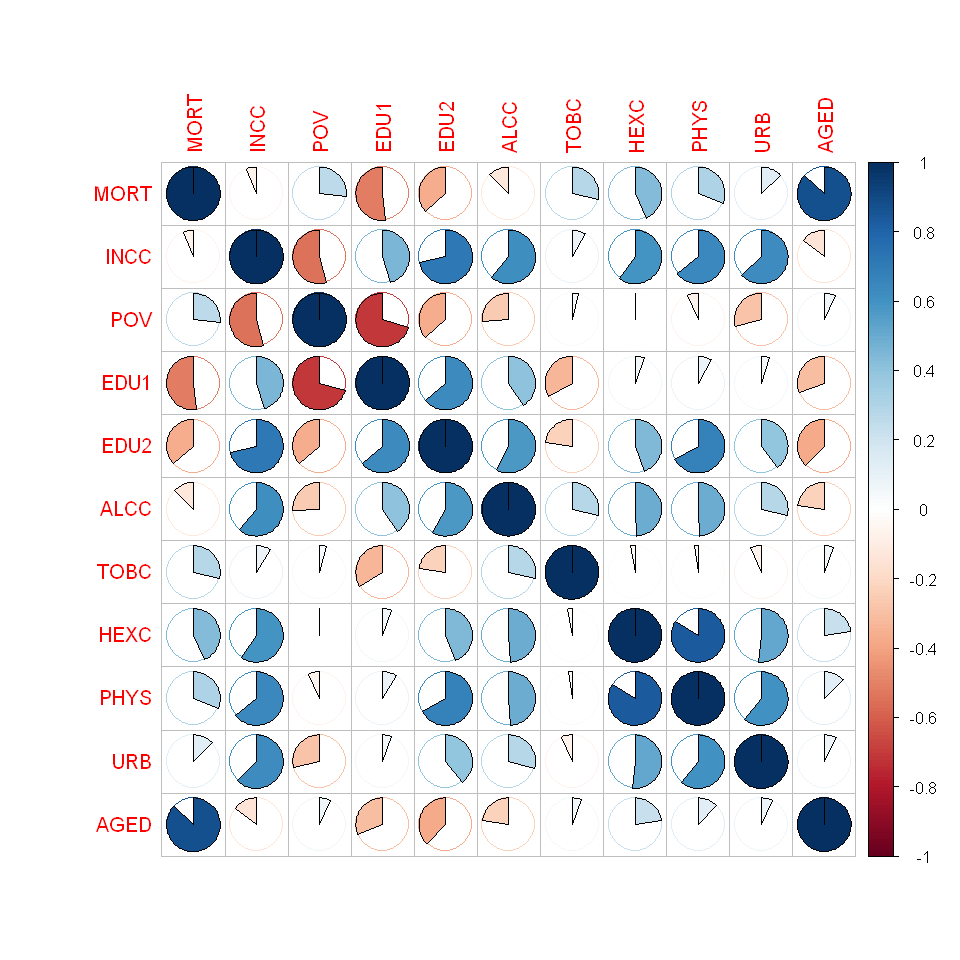

In [11]:
corrplot(cormat, method="pie")

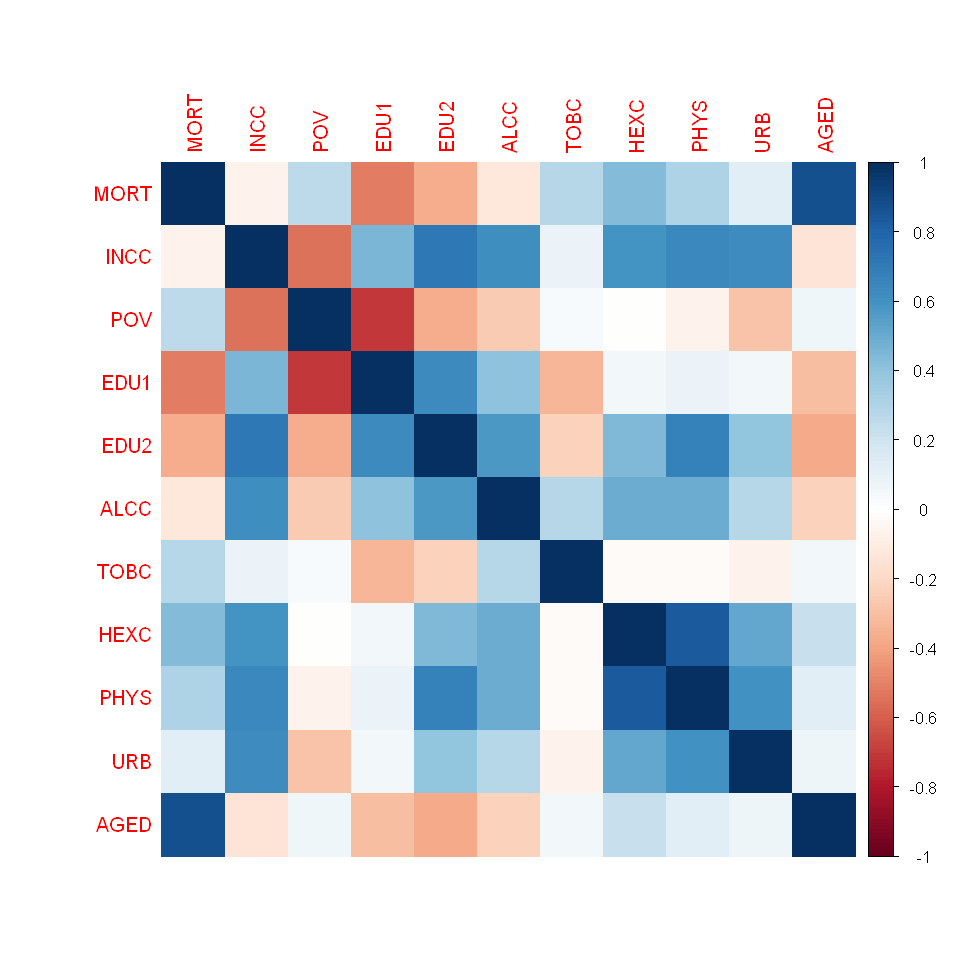

In [12]:
corrplot(cormat, method="color")

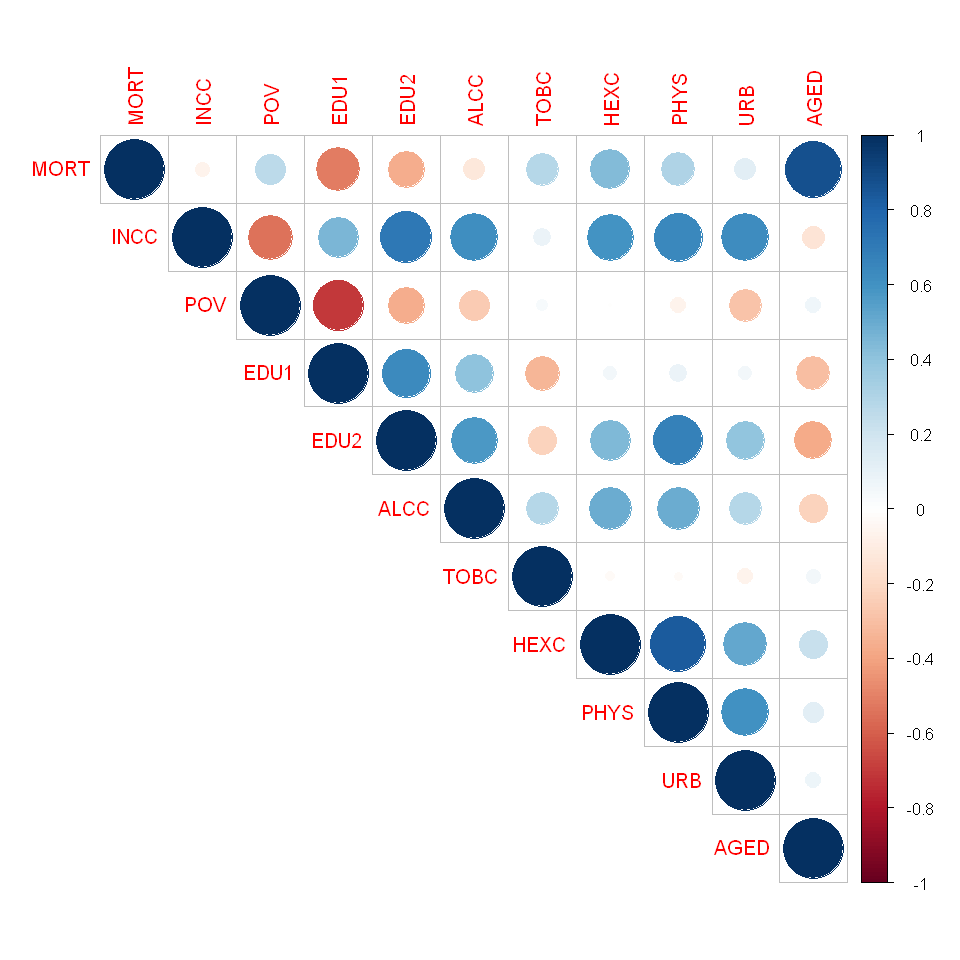

In [13]:
corrplot(cormat, type="upper")

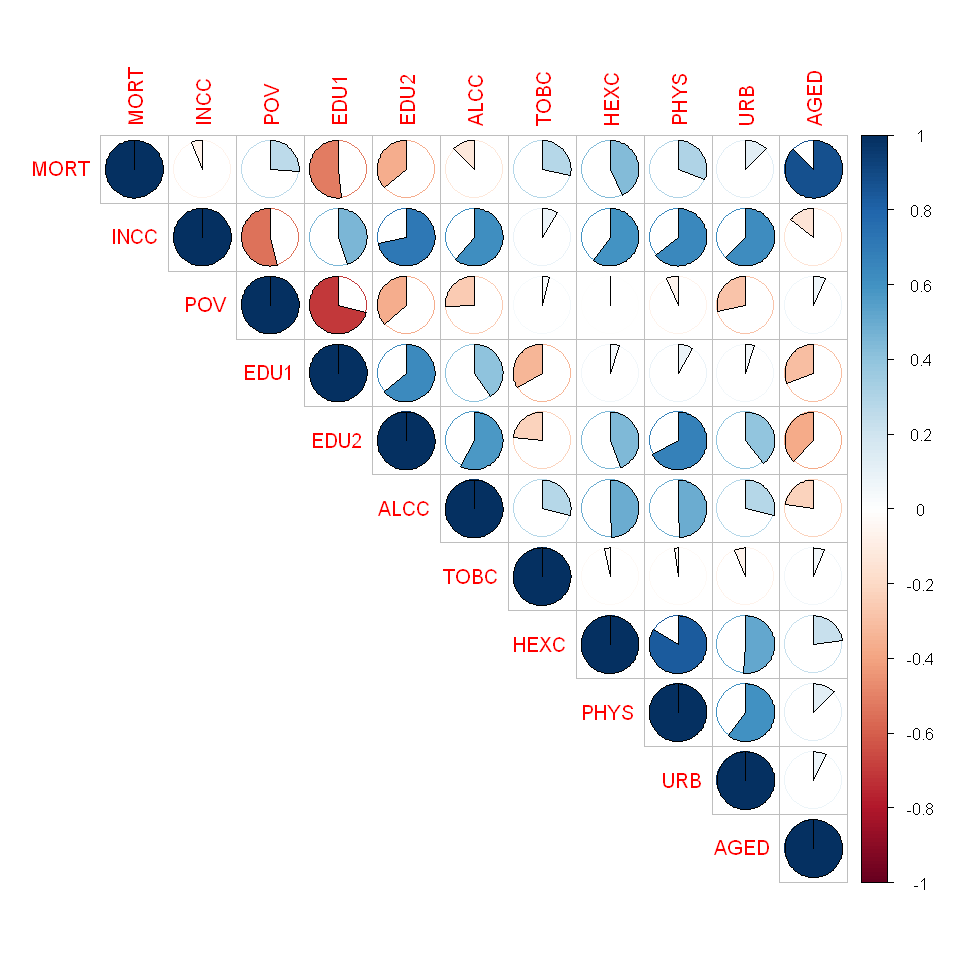

In [14]:
corrplot(cormat, type="upper", method="pie")

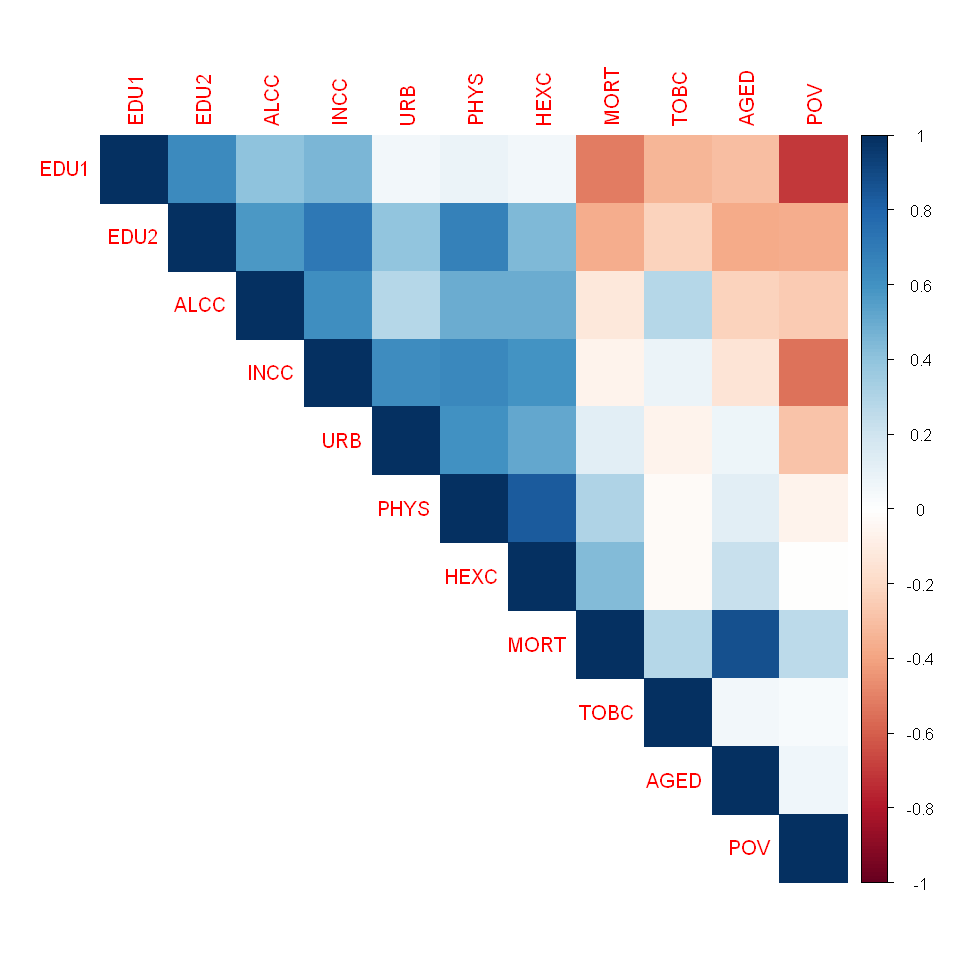

In [15]:
corrplot(cormat, type="upper", method="color", order="AOE")

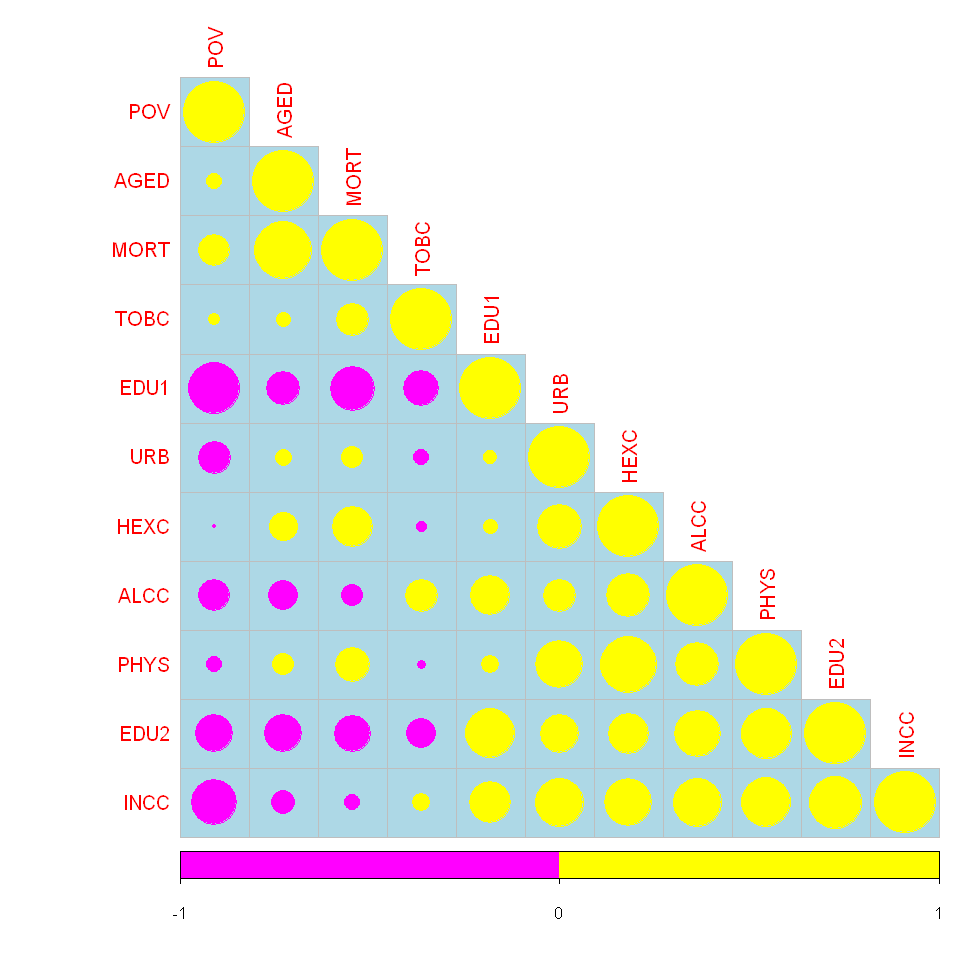

In [16]:
corrplot(cormat, type="lower", order="FPC", col=c("magenta", "yellow"),bg="lightblue")

In [17]:
cor.mtest = function(mat, ...) {
  mat = as.matrix(mat)
  n = ncol(mat)
  p.mat= matrix(NA, n, n)
  diag(p.mat) = 0
  for (i in 1:(n - 1)) {
    for (j in (i + 1):n) {
      tmp = cor.test(mat[, i], mat[, j], ...)
      p.mat[i, j] = p.mat[j, i] = tmp$p.value
    }
  }
  colnames(p.mat) = rownames(p.mat) = colnames(mat)
  p.mat
}

**matrix of the p-value of the correlation**

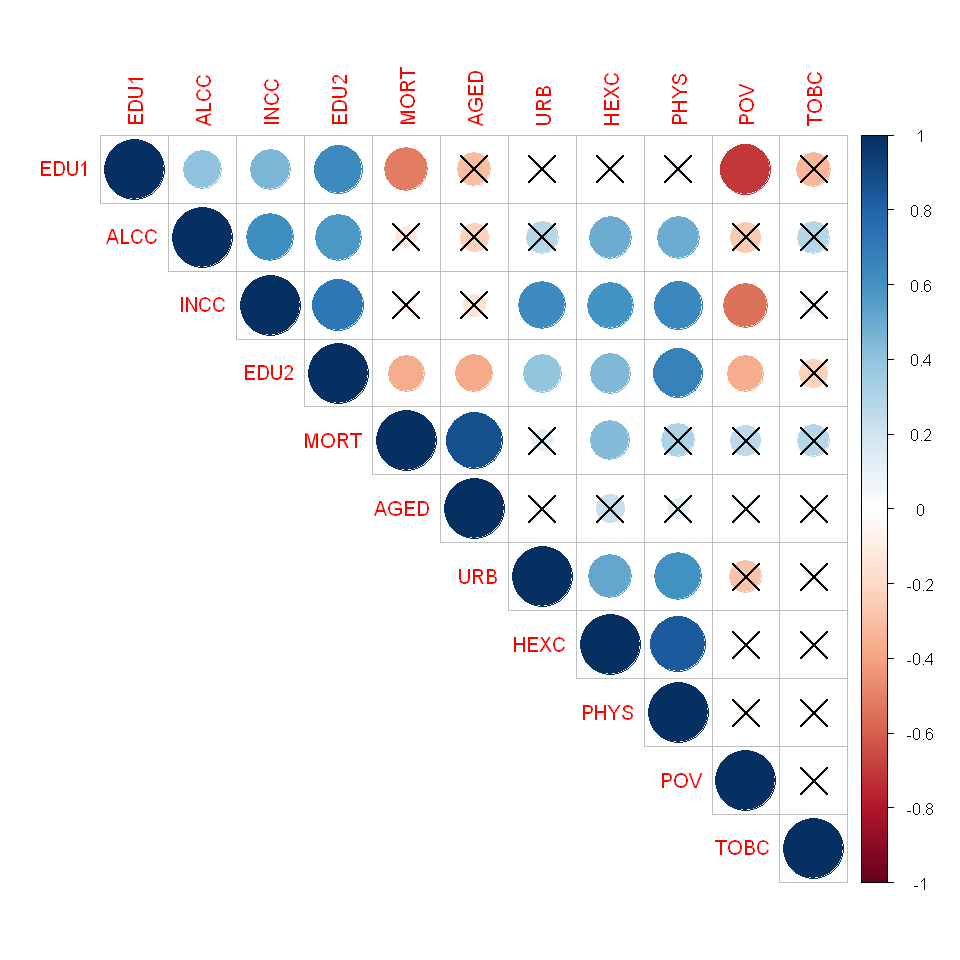

In [18]:
p.mat = cor.mtest(DATA_SET)
corrplot(cormat, type="upper", order="hclust", p.mat = p.mat, sig.level = 0.01)

**More examples in here:**

http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram

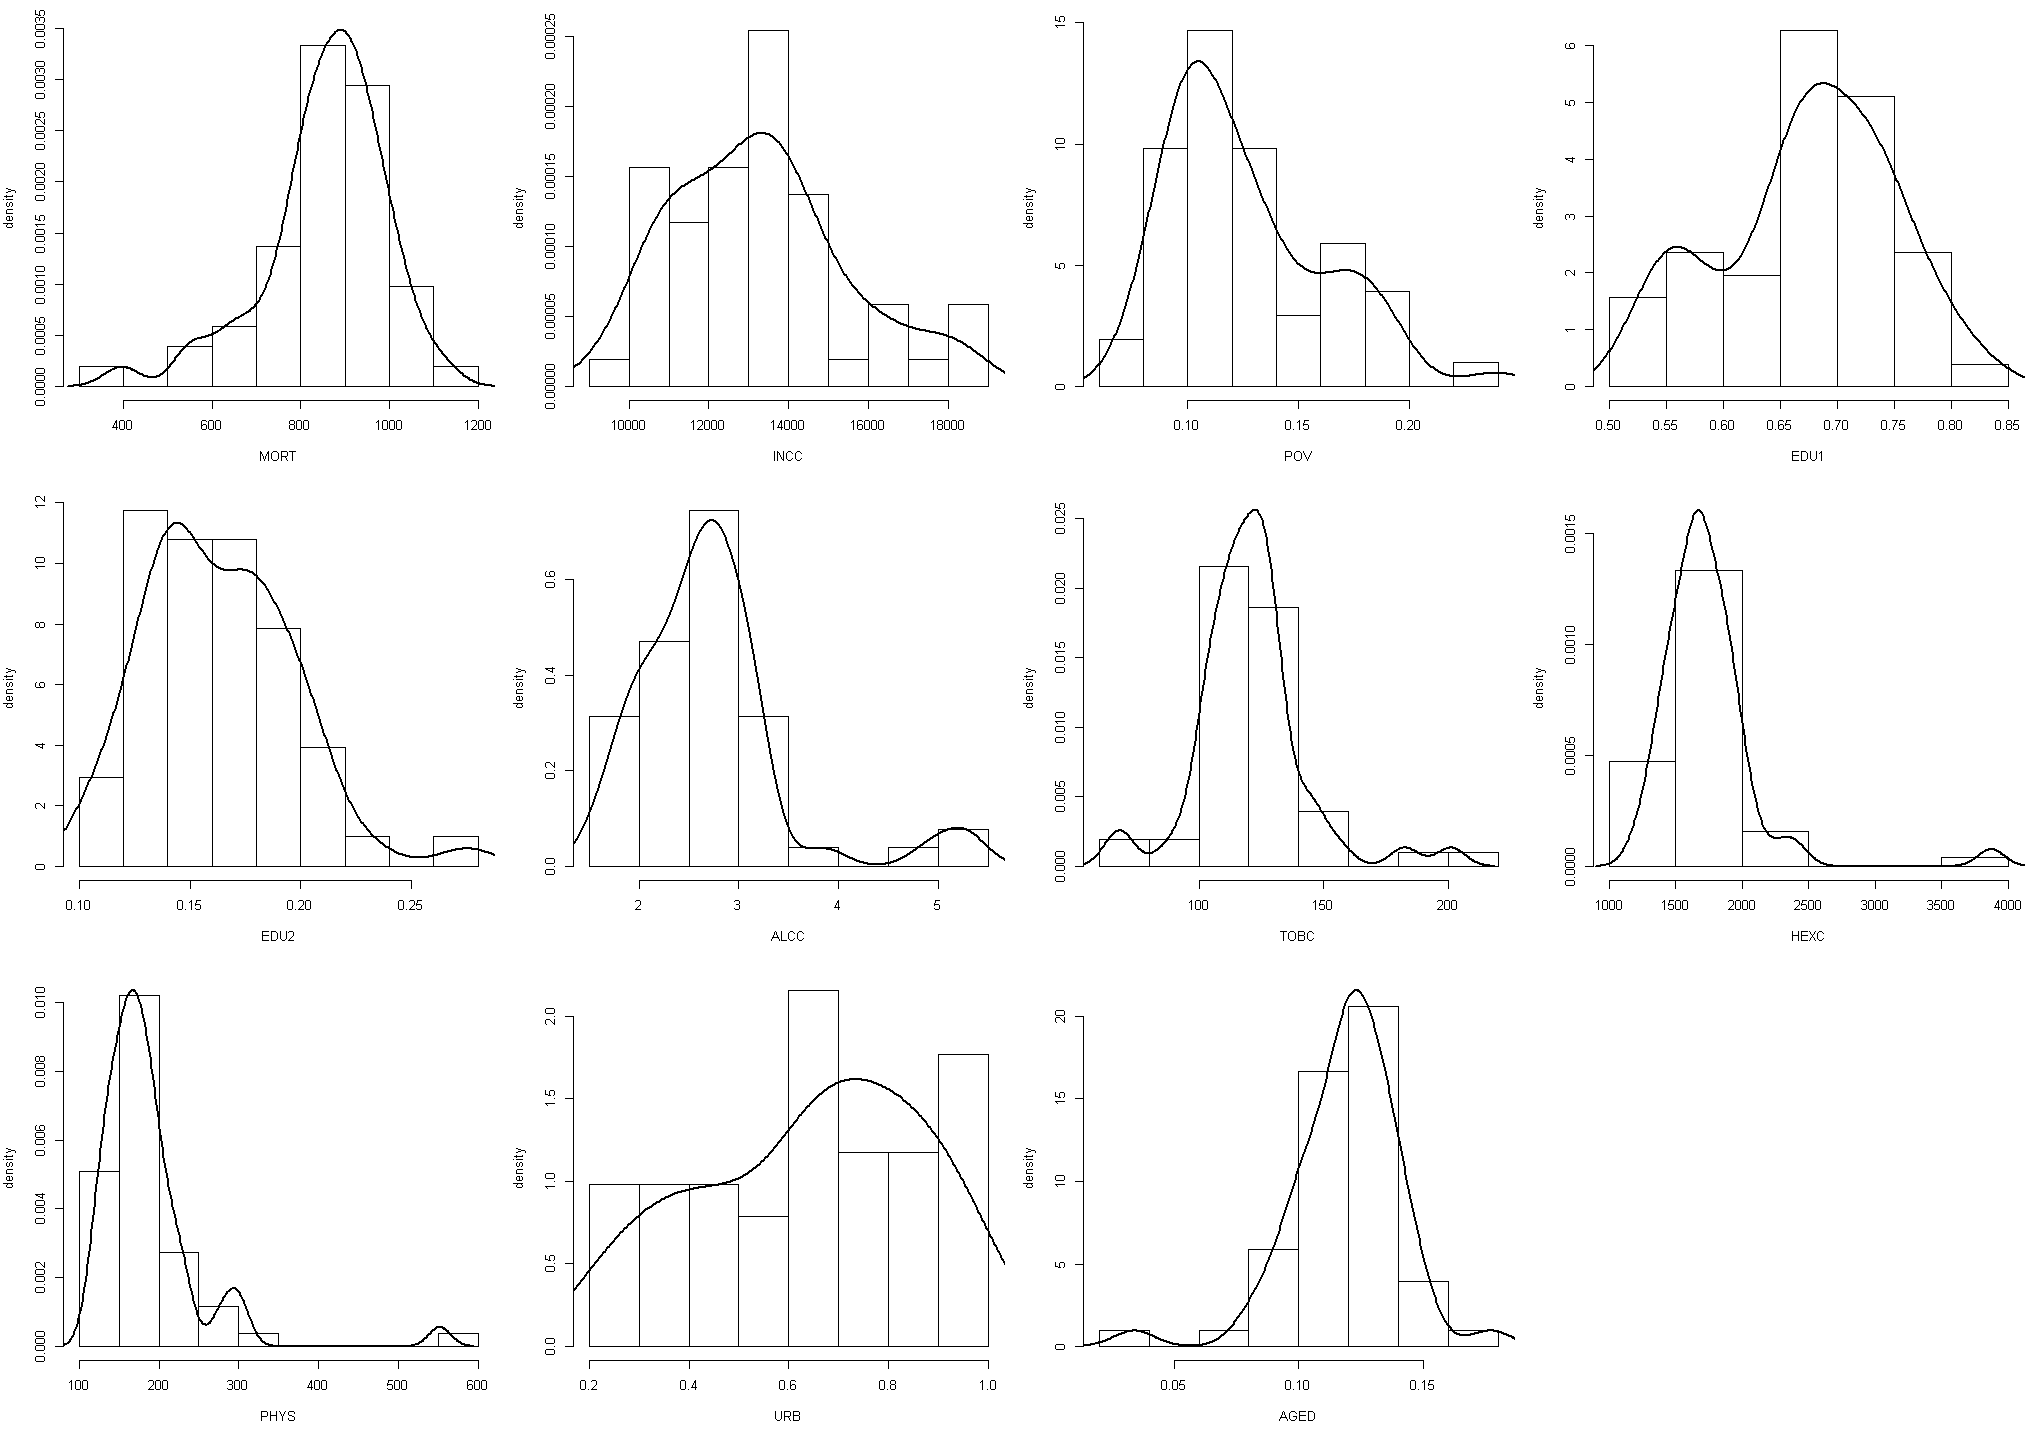

In [19]:
options(repr.plot.width=17, repr.plot.height=12)
par(mfrow = OptimizeMfrow(ncol(DATA_SET)),  mar = c(5, 4, 1, 1))
invisible(mapply(DoHistogram, DATA_SET, names(DATA_SET)))

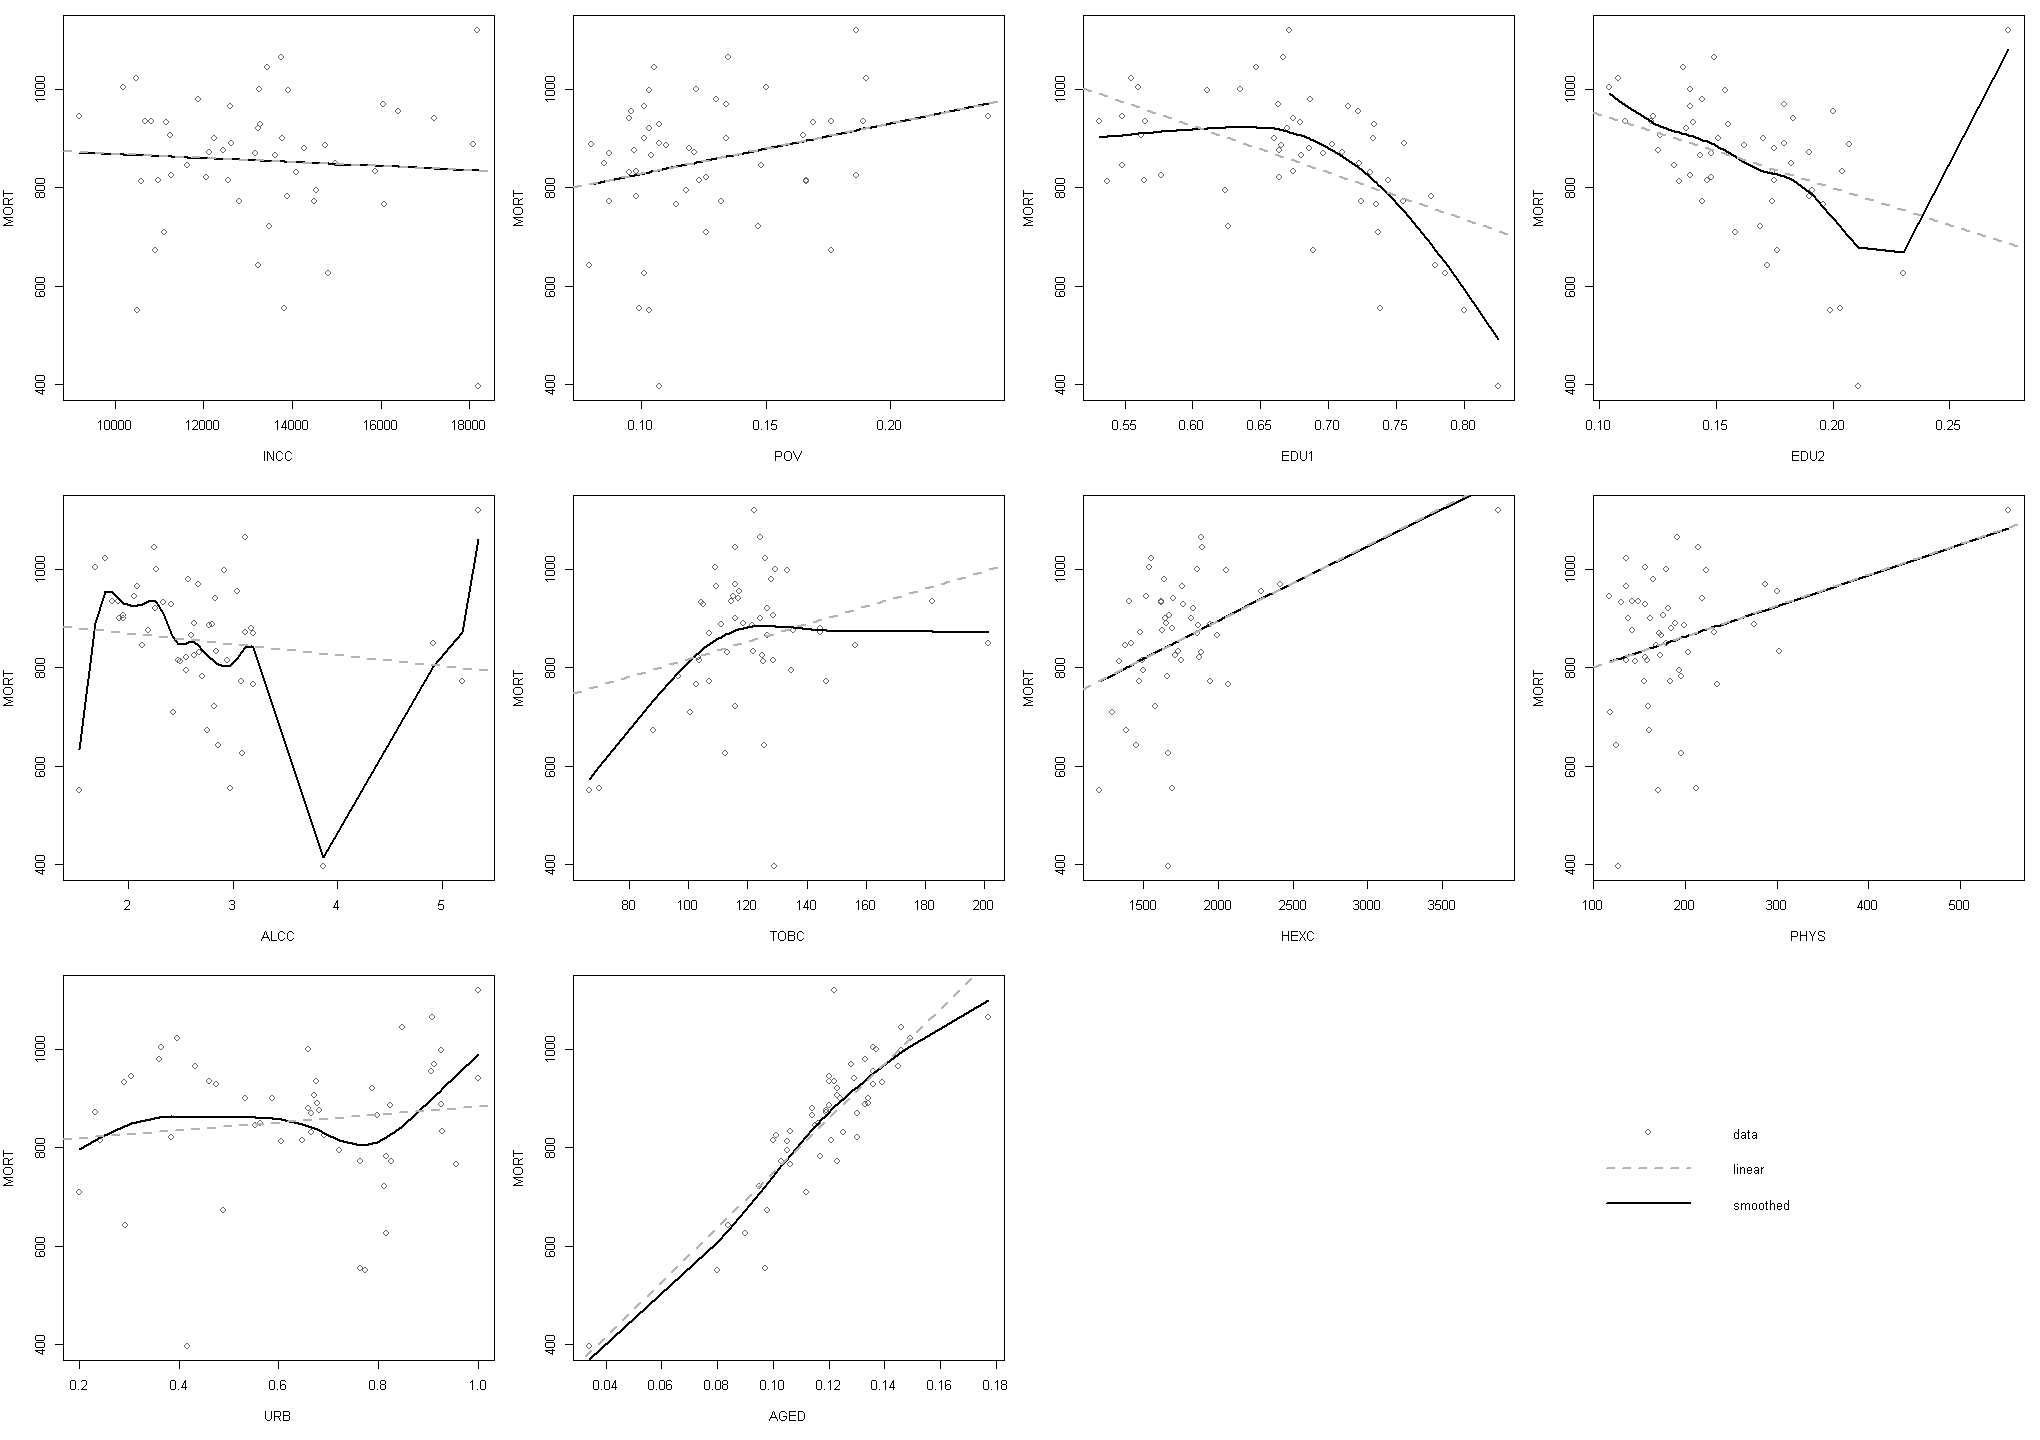

In [21]:
par(mfrow = OptimizeMfrow(ncol(DATA_SET) - 1),  mar = c(5, 4, 1, 1))
invisible(mapply(DoScatterplot, DATA_SET[-1], names(DATA_SET[-1])))
plot.new()
plot.new()
legend("left", c("data", "linear", "smoothed"), bty = "n",
       col = c(gray(0.4), gray(0.7), "black"), pch = c(1, -1, -1),
       lty = c(-1, 2, 1), lwd = c(-1, 2, 2))

Smoothing spline $f(x)$ is calculated by optimization of following formula:
$$\sum_{i=1}^N(y_i-f(x_i))^2+\lambda \int_D(f^{''}(t))^2\textit{d}t \rightarrow min$$

where $\lambda$ is smoothing parameter (set automatically in R). Optimal solution of above formula is always continous spline consisted of cubic polynomials.

## Cross Validation and LOESS

Dataset:

http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

In [22]:
set.seed(1)

# Function for splitting dataset
GetSplitLabels = function(data.length, proportions) {
  proportioned.labels = rep(1:length(proportions), proportions)
  labels = rep(proportioned.labels,len = data.length)
  return(sample(labels, data.length))
}

**Loading an preprocessing data**

![](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)

In [23]:
CV_FOLDS = 10
SPAN_LEVELS = seq(from = 0.1, to = 1, length.out = 100)
RAW_DATA_SET = readLines("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
LSTAT = as.numeric(substr(RAW_DATA_SET, 85, 90))
MEDV = as.numeric(substr(RAW_DATA_SET, 92, 97))
MERGED = data.frame(MEDV,LSTAT)

In [24]:
LSTAT.bounds = range(LSTAT)
LSTAT.grid = seq(from = LSTAT.bounds[1], to = LSTAT.bounds[2])

In [25]:
# "span" parameter defines the share of neighbours we take into account
fit = loess(MEDV~LSTAT, span=.2, data=MERGED)
# s=0.2 (better local fit - curve is less smooth)
fit2 = loess(MEDV~LSTAT, span=.5, data=MERGED) 
# s=0.5 (lbetter global fit - smoother curve)

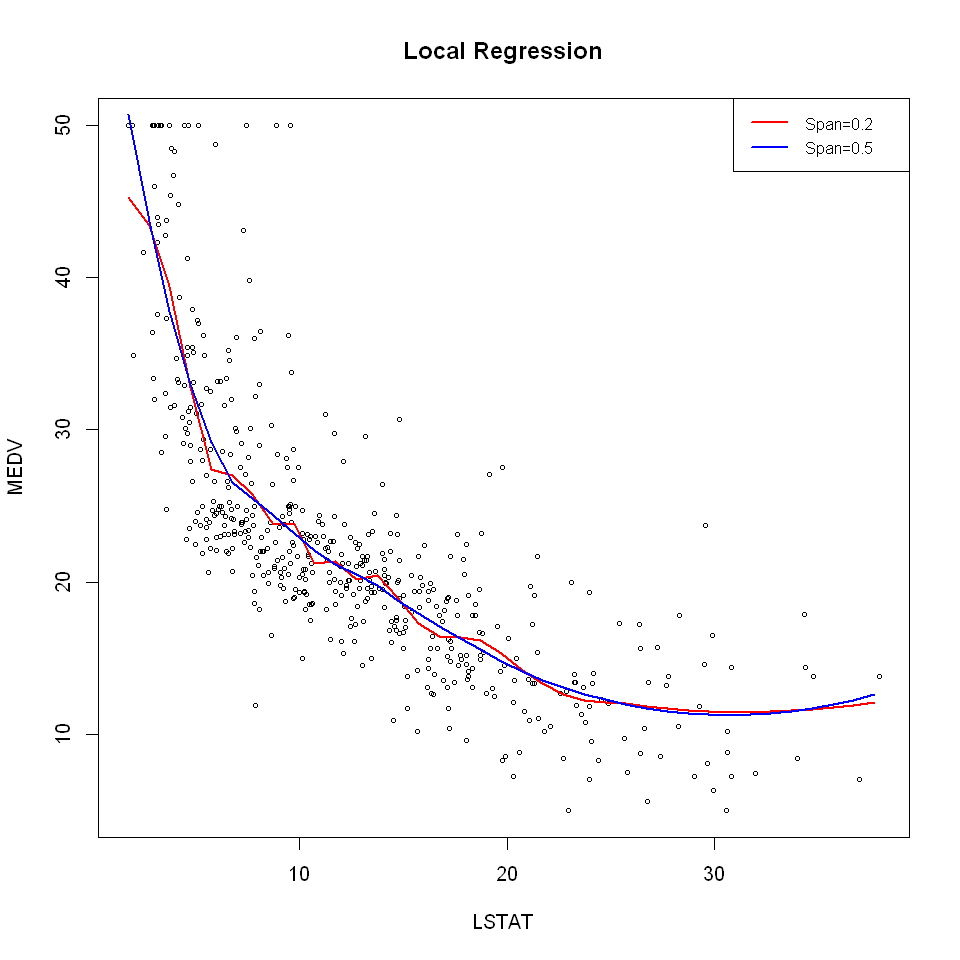

In [26]:
options(repr.plot.width=8, repr.plot.height=8)
plot(LSTAT, MEDV, cex=.5, col="black")
title("Local Regression")
lines(LSTAT.grid,predict(fit,data.frame(LSTAT=LSTAT.grid)),col="red",lwd=2) # s=0.2
lines(LSTAT.grid,predict(fit2,data.frame(LSTAT=LSTAT.grid)),col="blue",lwd=2) # s=0.5
legend("topright",legend=c("Span=0.2","Span=0.5"),col=c("red","blue"),lty=1,lwd=2,cex=.8)


Local regression (LOESS) work as follows:

For any given point $x_0$ prediction of second degree LOESS (default for `loess` function in R) is defined by formula:

$$\hat{f}(x_0)=\hat{\alpha}(x_0)+\hat{\beta}(x_0)x_0+\hat{\gamma}(x_0)x_0^2$$

Coefficients $\alpha,\beta,\gamma$ are calculated for given point $x_0$ and are obtained through optimization task:

$$\min_{\alpha(x_0),\beta(x_0),\gamma(x_0)} \sum_{i=1}^NK_{\lambda}(x_0,x_i)\left(\alpha(x_0)+\beta(x_0)x_i+\gamma(x_0)x_i^2-y_i\right)^2$$

where $K_{\lambda}$ is defined as:

$$K_{\lambda}(x_0,x_i)=\phi\left(\frac{|x_0-x_i|}{\lambda}\right)$$

**Creation of labels for cross-validation**

In [27]:
split.labels = GetSplitLabels(length(LSTAT), rep(1, CV_FOLDS))

In [28]:
sse = numeric(length(SPAN_LEVELS))
for (fold in 1:CV_FOLDS) {
  training.x = LSTAT[split.labels != fold]
  training.y = MEDV[split.labels != fold]
  testing.x = LSTAT[split.labels == fold]
  testing.y = MEDV[split.labels == fold]
  for (i in 1:length(SPAN_LEVELS)) {
    model = loess(training.y ~ training.x, span = SPAN_LEVELS[i],
                   control = loess.control(surface = "direct"))
    prediction = predict(model, data.frame(training.x = testing.x))
    sse[i] = sse[i] + sum((prediction - testing.y) ^ 2)
  }
}

In [29]:
optimal.span = SPAN_LEVELS[which.min(sse)]
model = loess(MEDV ~ LSTAT, span = optimal.span)

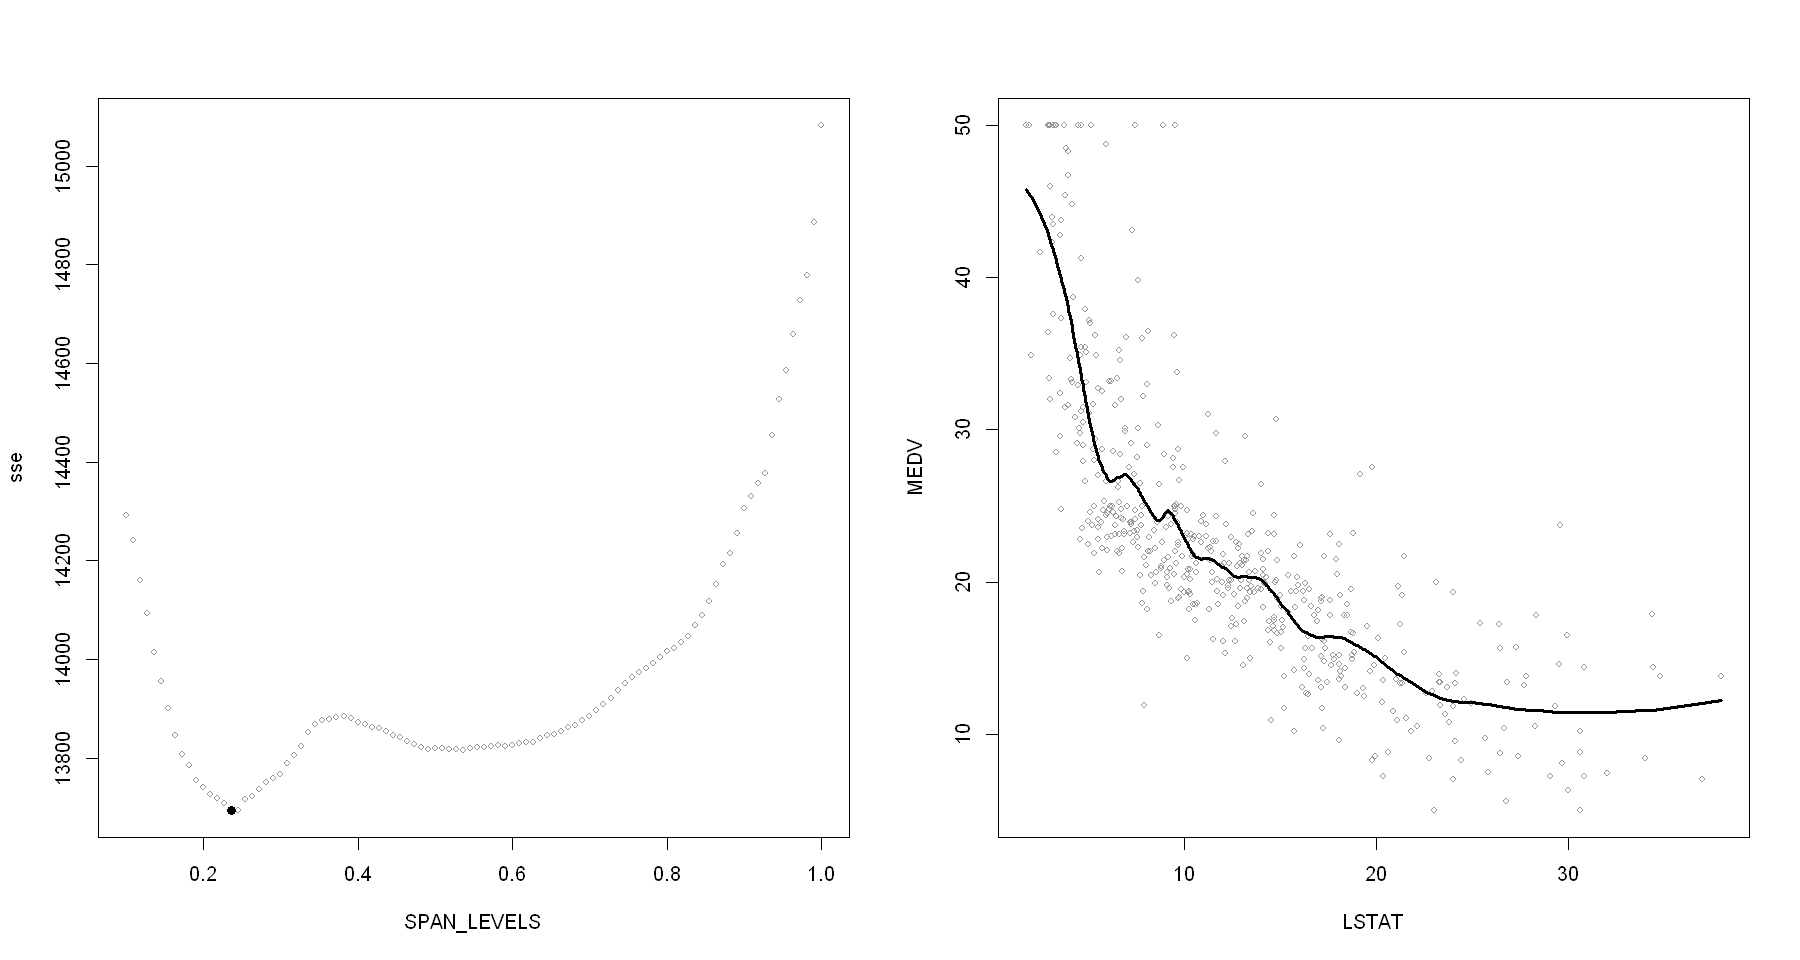

In [30]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow = c(1, 2))
plot(SPAN_LEVELS, sse, cex = 0.7, col = gray(0.6))
points(optimal.span, sse[which.min(sse)], pch = 19)
plot(LSTAT, MEDV, cex = 0.7, col = gray(0.6))
lines(sort(LSTAT), predict(model)[order(LSTAT)], lwd = 3)

## GAM

In [31]:
library(mgcv)
library(ROCR)
library(Ecdat)

Loading required package: nlme

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.

Loading required package: gplots


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess


Loading required package: Ecfun


Attaching package: 'Ecfun'


The following object is masked from 'package:base':

    sign



Attaching package: 'Ecdat'


The following object is masked from 'package:nlme':

    Gasoline


The following object is masked from 'package:datasets':

    Orange




In [32]:
set.seed(1)
head(Participation)

,lfp,lnnlinc,age,educ,nyc,noc,foreign
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,no,10.78750,3.0,8,1,1,no
2,yes,10.52425,4.5,8,0,1,no
3,no,10.96858,4.6,9,0,0,no
4,no,11.10500,3.1,11,2,0,no
5,no,11.10847,4.4,12,0,2,no
6,yes,11.02825,4.2,12,0,1,no


In [33]:
LABELS = factor(rep(c("train", "test"), length = nrow(Participation)))
random.labels = sample(LABELS)
split.data = split(Participation, random.labels)

**GLM**

$$g(E_Y(y|x))=\beta_0+\beta_1{}x_{1}+\ldots{}\beta_p{}x_{p}$$

$g()$ is a link function. For example in logistic regression:

$$ln\left(\frac{E_Y(y|x)}{1-E_Y(y|x)}\right)=ln\left(\frac{P(y=1|x)}{1-P(y=1|x)}\right)=x^{T}\beta$$

**GAM**

$$g(E_Y(y|x))=\beta_0+f_1(x_{1})+f_2(x_{2})+\ldots+f_p(x_{p})$$

In [34]:
glm.model = glm(lfp ~ lnnlinc + age,
                 family = binomial, data = split.data$train)
gam.model = gam(lfp ~ s(lnnlinc) + s(age),
                 family = binomial, data = split.data$train)
glm.prediction = predict(glm.model, newdata = split.data$test)
gam.prediction = as.vector(predict(gam.model, newdata = split.data$test))

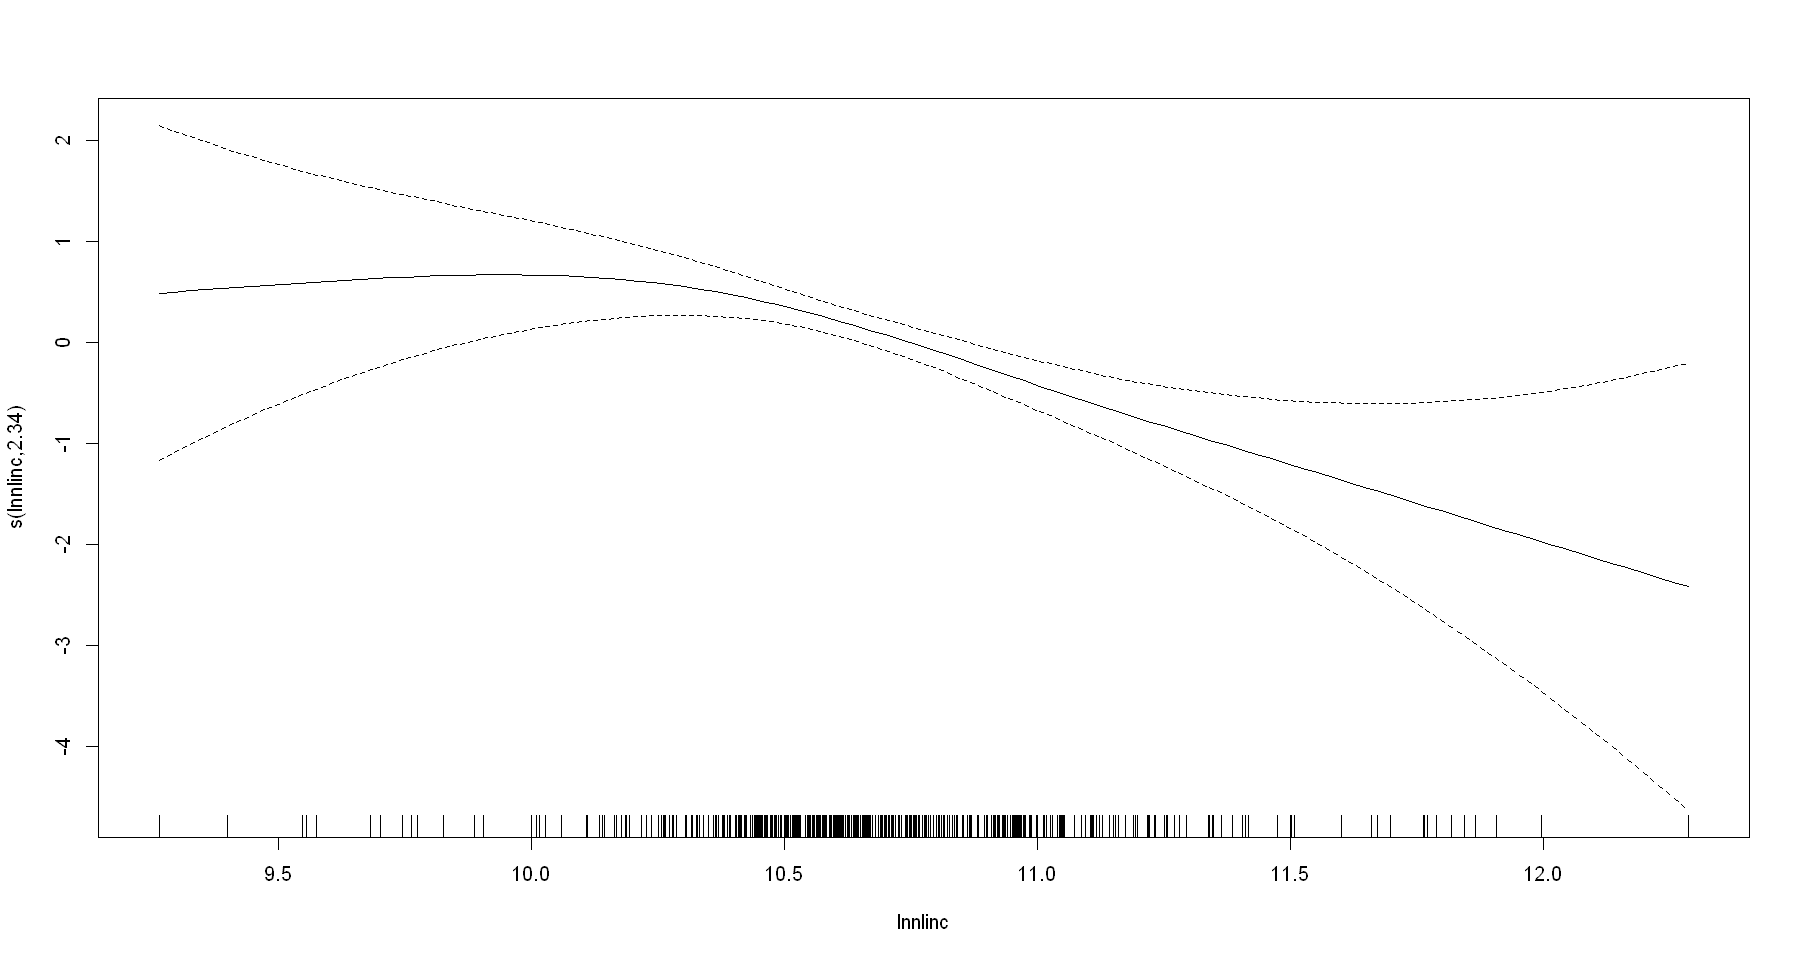

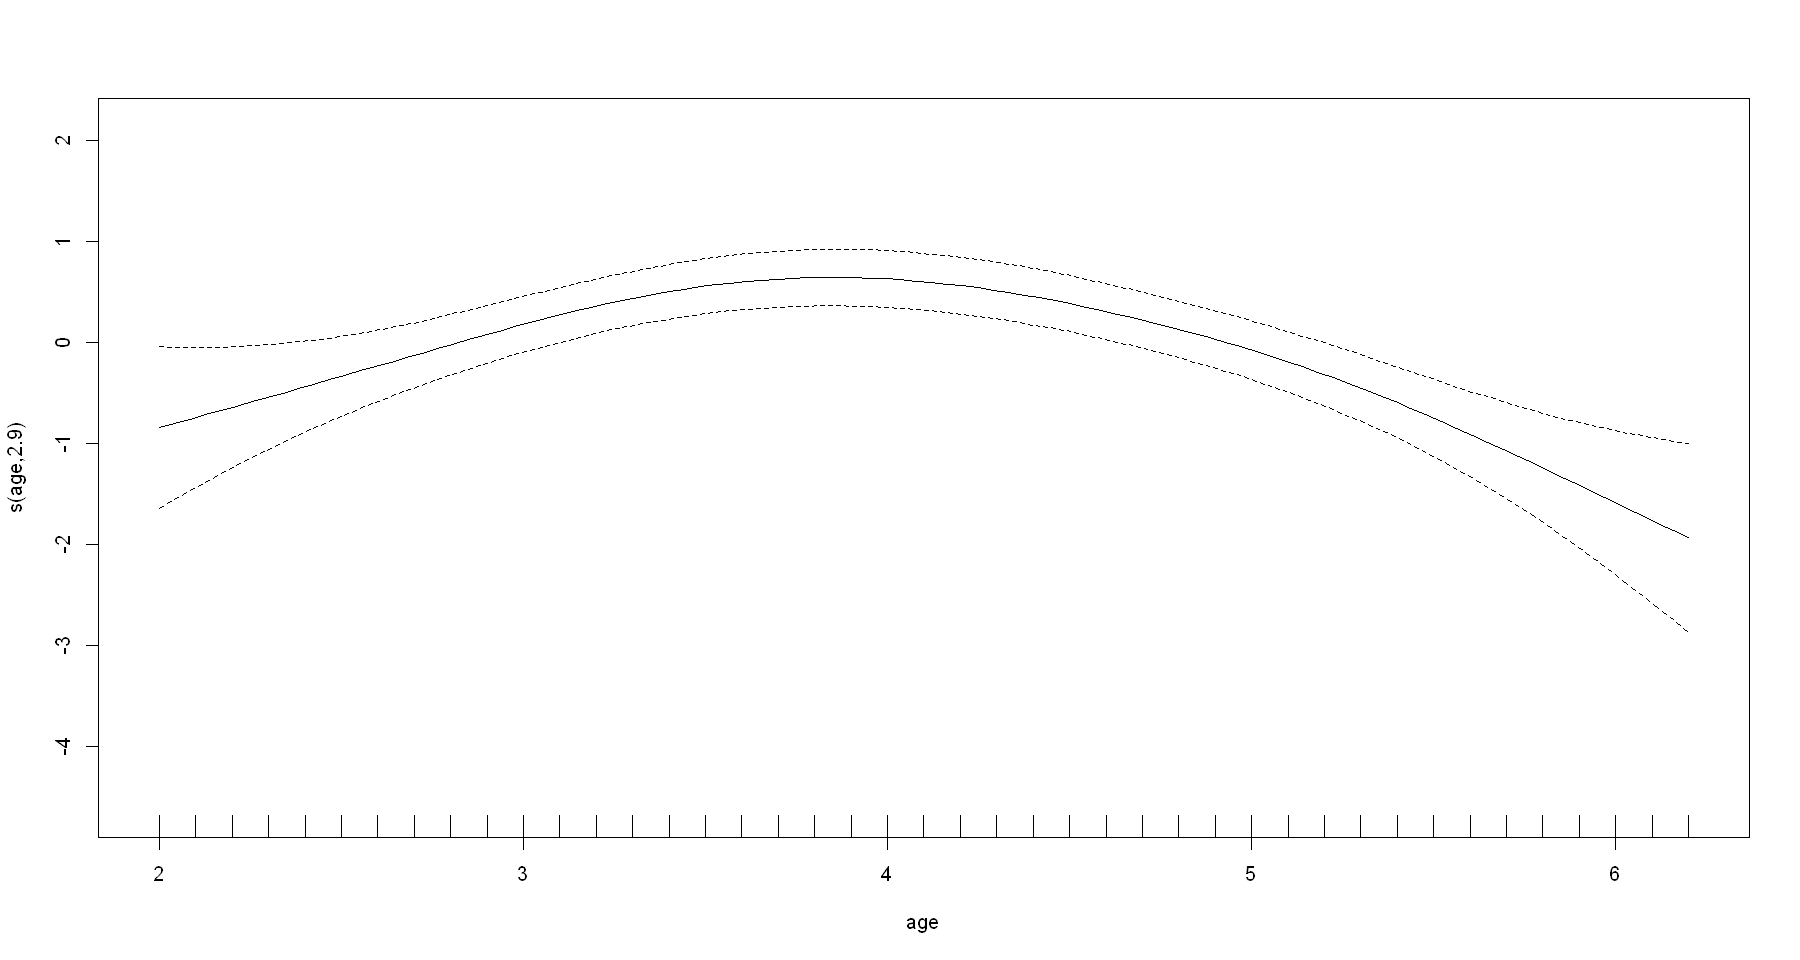

In [35]:
plot(gam.model)

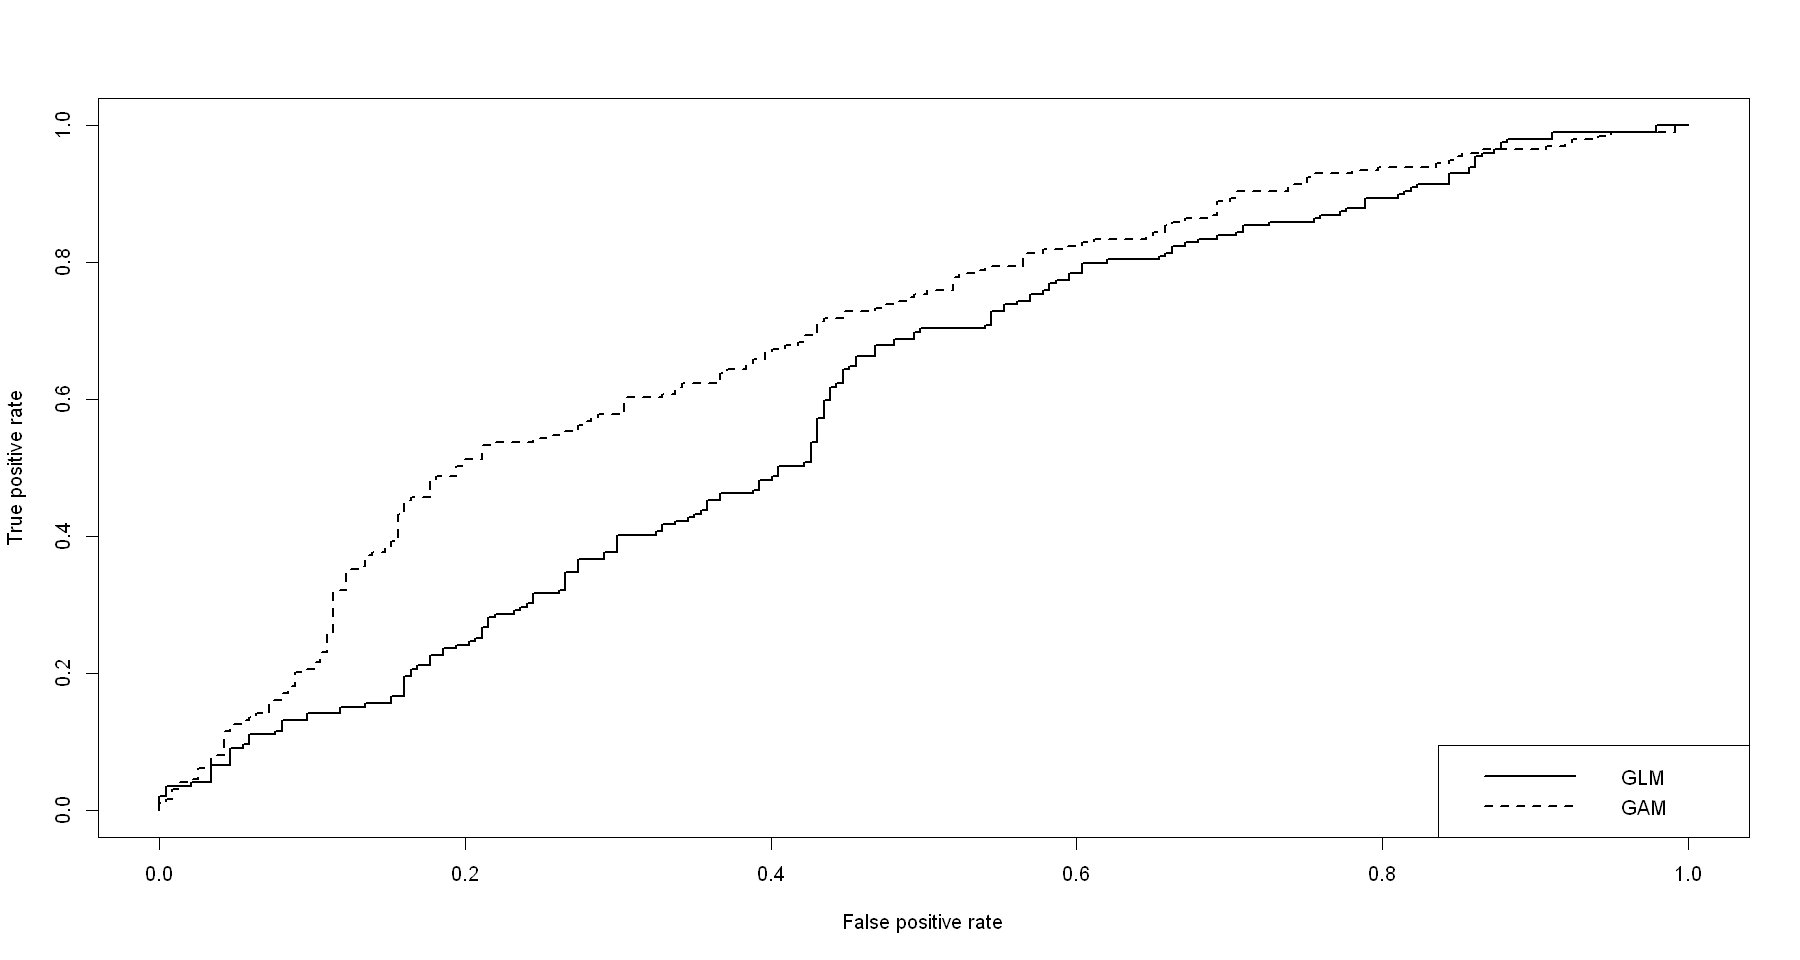

In [36]:
par(mfrow = c(1,1))

plot(performance(prediction(gam.prediction, split.data$test$lfp),"tpr", "fpr"),lwd = 2, lty = 2)
plot(performance(prediction(glm.prediction, split.data$test$lfp),"tpr", "fpr"),add = TRUE, lwd = 2, lty = 1)
legend("bottomright", c("GLM", "GAM"),lwd = 2, lty = 1:2)